# CREATE LIST WITH TOKENS

In [1]:
from nltk.tokenize import sent_tokenize
from greek_stemmer import GreekStemmer
import spacy
nlp = spacy.load('el_core_news_md')
import csv
import gensim

In [2]:
from nltk.tokenize import word_tokenize

#nltk.download('punkt')
file_review = "final_2gram.csv"
stemmer = GreekStemmer()
textList=[]
with open(file_review,) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    replacements = [('έ','ε'),('ό','ο'),('ή','η'),('ώ','ω'),('ά','α'),('ί','ι'),('ύ','υ'),('ϊ','ι')]
    def remove_accents(u):
        for a, b in replacements:
            u = u.replace(a, b)
        return u
    for row in csv_reader:
        if line_count == 0:
            line_count+=1
            continue
        else:
            ch=''
            review_2 = str(row[1]).lower()
            pureText = nlp(review_2)
            ngt = str(row[2]).lower()
            ngt_txt = nlp(ngt)
            #for token in pureText :
            #if()
            #print(pureText)
                #for char in pureText:
                    #print(remove_accents(char))
                    #text=remove_accents(pureText.text)
                    #print(text)
                #stemmed =(stemmer.stem(text.upper())).lower()
                #print(textList)
            textList.append(word_tokenize(pureText.text))
            textList.append(word_tokenize(ngt_txt.text))
                #textList.append(word_tokenize(text))
                #textList.append(word_tokenize(stemmed))

/home/dimitra/miniconda3/envs/venv/lib/python3.6/site-packages/greek_stemmer/__init__.py:340: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  custom_rules = yaml.load(f.read())


In [3]:
print(len(textList))

138758


# TRAINING

In [4]:
import nltk 
from gensim.models import Word2Vec
import multiprocessing

In [5]:
EMB_DIM = 300

w2v= Word2Vec(textList,size=EMB_DIM,window=5,min_count=1,negative=15,iter=10,workers=multiprocessing.cpu_count(),sg=0)

In [14]:
print(len(word_vectors.vocab))

27669


In [7]:

word_vectors=w2v.wv


In [9]:
keras_vectors = word_vectors.get_keras_embedding(train_embeddings=False)

Using TensorFlow backend.
W0908 16:11:57.134186 139683627538240 deprecation_wrapper.py:119] From /home/dimitra/miniconda3/envs/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [27]:
word_vectors.index2word[1]

'καλή'

In [8]:
word_vectors.most_similar('κακό')

[('χειρότερο', 0.8356301784515381),
 ('ηλίθιο', 0.7839646339416504),
 ('αστείο', 0.77128005027771),
 ('ανόητο', 0.7569218277931213),
 ('φρικτό', 0.7457965016365051),
 ('παράξενο', 0.7254331707954407),
 ('αξιοπρεπές', 0.7224221229553223),
 ('ενοχλητικό', 0.7194263935089111),
 ('τρομερό', 0.707736074924469),
 ('nightshot', 0.7072233557701111)]

In [10]:

w2v.save("newgrmodel.bin")

In [20]:
w2v.predict_output_word("δεν")

In [30]:
word_vectors.word_vec("τηλέφωνο")

array([-0.48527265,  0.3497303 ,  0.18970878,  0.39602578, -0.4112092 ,
       -0.060914  , -0.13931192, -0.7272563 , -0.35430476, -0.01999168,
        0.04172644, -0.33940434,  0.22094785,  0.17955218,  0.16213712,
       -0.6734555 , -0.25813097, -0.80677766,  0.18639927, -0.731861  ,
        0.62286955, -0.4251926 , -0.17695422,  0.6887985 , -0.45357352,
       -0.5189089 , -0.47337437,  0.495417  ,  0.36959246,  0.5813345 ,
        0.33872202, -0.08295719, -0.49571425,  0.3203521 ,  0.53220433,
       -0.24698882, -0.37709782, -0.30500105, -0.317189  ,  0.45325726,
        0.10721426,  0.8151065 ,  0.42501897, -0.4532765 , -0.28516257,
        0.36337635,  0.46977374,  0.2171288 , -0.5703406 , -0.42800796],
      dtype=float32)

In [70]:
word_vectors.save("my_embeddings.model")

In [63]:
word_vectors.get_vector("κακο")

array([-0.14154825,  0.23092479,  0.372855  ,  0.11644154,  0.19162163,
        0.08915252, -0.4050618 , -0.39399475,  0.00481213, -0.02997936,
        0.09815961,  0.25041083, -0.00730862,  0.19526045, -0.05295061,
        0.11629859, -0.14069766,  0.13029765, -0.00318636,  0.03957234,
        0.18565477, -0.51504916, -0.11289053,  0.03723231,  0.09473854,
        0.19017345, -0.30677792,  0.1241376 , -0.09343166, -0.18879156,
       -0.04603676,  0.13481116,  0.26094368, -0.26541907,  0.15777367,
        0.12721926,  0.25431067,  0.40515462, -0.05583891, -0.18959433,
       -0.00191035,  0.03523154, -0.16887061, -0.16912092, -0.0141286 ,
       -0.06830721, -0.23357525,  0.03040077, -0.10334092, -0.45409617,
       -0.00214439,  0.24897677, -0.03651919, -0.12142036, -0.31932   ,
        0.11996031,  0.3131687 , -0.3103222 ,  0.18945324,  0.07052292,
       -0.06390376,  0.12799765,  0.32651424,  0.12699409, -0.39041978,
       -0.4620185 , -0.07053201,  0.19979796, -0.04171382, -0.00

# LOAD MODEL 

In [154]:
##LOAD MODEL
from gensim.test.utils import datapath
model2 =KeyedVectors.load("my_embeddings.model")

In [156]:
model2.most_similar("κακό")

[('χειρότερο', 0.82022625207901),
 ('ηλίθιο', 0.7364065647125244),
 ('αστείο', 0.7185556292533875),
 ('ανόητο', 0.7134792804718018),
 ('αξιοπρεπές', 0.710453987121582),
 ('ενοχλητικό', 0.6806661486625671),
 ('φρικτό', 0.6733756065368652),
 ('παράξενο', 0.6668476462364197),
 ('βαρετό', 0.6608639359474182),
 ('θλιβερό', 0.6567660570144653)]

In [89]:
import numpy as np
import tensorflow as tf

In [106]:
word_vectors.vectors

array([[ 0.15444888,  0.24175873,  0.25744155, ...,  0.26139668,
        -0.3913014 , -0.45656055],
       [-0.19411476, -0.92875046, -0.6769388 , ..., -0.5134099 ,
         0.86072147, -0.22392198],
       [ 0.05661738,  0.52069217,  0.21316004, ...,  0.03722081,
        -0.59576154, -0.32176605],
       ...,
       [-0.03923724,  0.02284836,  0.12823941, ...,  0.04829615,
         0.02048208, -0.0058416 ],
       [-0.02365134,  0.03120159,  0.11483307, ...,  0.10038359,
        -0.02991159,  0.01048442],
       [-0.03091647,  0.12087036,  0.17792986, ...,  0.10197782,
         0.00636244,  0.02320725]], dtype=float32)

In [157]:
import numpy as np

model = word_vectors
#Important Parameters
VOCAB_SIZE = len(model.vocab)
EMBEDDING_DIM = model["καλό"].shape[0]

w2v = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

In [158]:


tsv_file_path = "tensorboard/metadata.tsv"
with open(tsv_file_path,'w+', encoding='utf-8') as file_metadata:
    for i,word in enumerate(model.index2word[:VOCAB_SIZE]):
        w2v[i] = model[word]
        file_metadata.write(word+'\n')

In [159]:
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector

TENSORBOARD_FILES_PATH = "tensorboard"

In [160]:
#Tensorflow Placeholders
X_init = tf.placeholder(tf.float32, shape=(VOCAB_SIZE, EMBEDDING_DIM), name="embedding")
X = tf.Variable(X_init)

#Initializer
init = tf.global_variables_initializer()

#Start Tensorflow Session
sess = tf.Session()
sess.run(init, feed_dict={X_init: w2v})

#Instance of Saver, save the graph.
saver = tf.train.Saver()
writer = tf.summary.FileWriter(TENSORBOARD_FILES_PATH, sess.graph)

In [161]:
#Configure a Tensorflow Projector
config = projector.ProjectorConfig()
embed = config.embeddings.add()
embed.metadata_path = tsv_file_path

#Write a projector_config
projector.visualize_embeddings(writer,config)

#save a checkpoint
saver.save(sess, TENSORBOARD_FILES_PATH+'/model.ckpt', global_step = VOCAB_SIZE)

#close the session
sess.close()

In [162]:
! python -m tensorboard.main --logdir=/home/dimitra/Desktop/python/ptyxiaki/embeddings/tensorboard

W0808 17:54:28.502826 140015666661120 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
TensorBoard 1.14.0 at http://dimitra-laptop:6006/ (Press CTRL+C to quit)
I0808 17:54:32.045597 140015708608256 _internal.py:122] ::ffff:127.0.0.1 - - [08/Aug/2019 17:54:32] "GET / HTTP/1.1" 200 -
I0808 17:54:33.299584 140015708608256 _internal.py:122] ::ffff:127.0.0.1 - - [08/Aug/2019 17:54:33] "GET /font-roboto/oMMgfZMQthOryQo9n22dcuvvDin1pK8aKteLpeZ5c0A.woff2 HTTP/1.1" 200 -
I0808 17:54:46.244332 140015750555392 _internal.py:122] ::ffff:127.0.0.1 - - [08/Aug/2019 17:54:46] "GET / HTTP/1.1" 200 -
I0808 17:54:46.919654 140015826056960 _internal.py:122] ::ffff:127.0.0.1 - - [08/Aug/2019 17:54:46] "GET /font-roboto/oMMgfZMQthOryQo9n22dcuvvDin1pK8aKteLpeZ5c0A.woff2 HTTP/1.1" 200 -
I0808 17:54:48.409105 140015826056960 _internal.py:122] ::ffff:127.0.

In [181]:
embedding_clusters = []
word_clusters = []
for word in model.vocab:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
    


In [173]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    sl=[]
    nlist2=model.most_similar("κακό",topn= 100)
    for word2 in range(0, 99):
        sl.append(nlist2[word2][0])
    for word in model.wv.vocab:
        if (word in sl or word=="κακό"):
            tokens.append(model[word])
            labels.append(word)
            #print(tokens)
            #print(labels)

        
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    
    
    for i in range(len(x)):
        
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    #plt.margins(x=0, y=-0.4)
    plt.ylim([-2,2])
    plt.xlim([-5,2])
    plt.show()

/home/dimitra/miniconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


[array([ 2.33209372e-01, -1.35961905e-01, -3.70956689e-01, -2.26030082e-01,
        3.07857752e-01, -3.01538706e-01, -3.79096985e-01, -2.21267149e-01,
       -2.41700724e-01, -1.76916141e-02, -3.03433210e-01, -1.26131311e-01,
        4.24155444e-01, -4.37756211e-01, -6.94188893e-01, -1.61227450e-01,
       -1.57544926e-01, -1.43062428e-01, -2.38926440e-01,  4.26688135e-01,
        4.32768352e-02, -7.68857598e-01, -5.26033491e-02, -5.60763597e-01,
       -1.74958423e-01,  2.11418599e-01, -3.97694558e-01, -3.77966434e-01,
        1.00660753e+00, -6.52253270e-01,  2.18777061e-02,  3.73610221e-02,
        6.60183877e-02,  1.04260176e-01,  9.94100645e-02, -5.63001096e-01,
        5.18398099e-02,  1.42573994e-02, -1.90211087e-01,  7.31798857e-02,
       -9.34589207e-02,  3.08975458e-01,  5.44977665e-01,  1.53316736e-01,
        1.32978559e-01, -4.24535722e-01,  3.51144552e-01, -1.77640066e-01,
       -1.25475728e-03,  2.80559868e-01,  9.72379804e-01, -2.69544721e-01,
        5.79780936e-02, 

      dtype=float32)]
['χειρότερο', 'πραγματικό', 'bootleg', 'καλό', 'απογοητευτικό', 'θετικό', 'απλό', 'ολόκληρο', 'αξιοσημείωτο', 'δημιουργικό', 'χαζός', 'διαφορετικό', 'κακό', 'διασκεδαστικό', 'αγαπημένο', 'ενιαίο', 'τελικό', 'καλύτερο', 'σκοτεινό', 'ισχυρό', 'μακρύ', 'βαρετό', 'πράγμα', 'φρικτό', 'ρομαντικό']
[array([ 2.33209372e-01, -1.35961905e-01, -3.70956689e-01, -2.26030082e-01,
        3.07857752e-01, -3.01538706e-01, -3.79096985e-01, -2.21267149e-01,
       -2.41700724e-01, -1.76916141e-02, -3.03433210e-01, -1.26131311e-01,
        4.24155444e-01, -4.37756211e-01, -6.94188893e-01, -1.61227450e-01,
       -1.57544926e-01, -1.43062428e-01, -2.38926440e-01,  4.26688135e-01,
        4.32768352e-02, -7.68857598e-01, -5.26033491e-02, -5.60763597e-01,
       -1.74958423e-01,  2.11418599e-01, -3.97694558e-01, -3.77966434e-01,
        1.00660753e+00, -6.52253270e-01,  2.18777061e-02,  3.73610221e-02,
        6.60183877e-02,  1.04260176e-01,  9.94100645e-02, -5.63001096e-01,
        5

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[array([ 2.33209372e-01, -1.35961905e-01, -3.70956689e-01, -2.26030082e-01,
        3.07857752e-01, -3.01538706e-01, -3.79096985e-01, -2.21267149e-01,
       -2.41700724e-01, -1.76916141e-02, -3.03433210e-01, -1.26131311e-01,
        4.24155444e-01, -4.37756211e-01, -6.94188893e-01, -1.61227450e-01,
       -1.57544926e-01, -1.43062428e-01, -2.38926440e-01,  4.26688135e-01,
        4.32768352e-02, -7.68857598e-01, -5.26033491e-02, -5.60763597e-01,
       -1.74958423e-01,  2.11418599e-01, -3.97694558e-01, -3.77966434e-01,
        1.00660753e+00, -6.52253270e-01,  2.18777061e-02,  3.73610221e-02,
        6.60183877e-02,  1.04260176e-01,  9.94100645e-02, -5.63001096e-01,
        5.18398099e-02,  1.42573994e-02, -1.90211087e-01,  7.31798857e-02,
       -9.34589207e-02,  3.08975458e-01,  5.44977665e-01,  1.53316736e-01,
        1.32978559e-01, -4.24535722e-01,  3.51144552e-01, -1.77640066e-01,
       -1.25475728e-03,  2.80559868e-01,  9.72379804e-01, -2.69544721e-01,
        5.79780936e-02, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[array([ 2.33209372e-01, -1.35961905e-01, -3.70956689e-01, -2.26030082e-01,
        3.07857752e-01, -3.01538706e-01, -3.79096985e-01, -2.21267149e-01,
       -2.41700724e-01, -1.76916141e-02, -3.03433210e-01, -1.26131311e-01,
        4.24155444e-01, -4.37756211e-01, -6.94188893e-01, -1.61227450e-01,
       -1.57544926e-01, -1.43062428e-01, -2.38926440e-01,  4.26688135e-01,
        4.32768352e-02, -7.68857598e-01, -5.26033491e-02, -5.60763597e-01,
       -1.74958423e-01,  2.11418599e-01, -3.97694558e-01, -3.77966434e-01,
        1.00660753e+00, -6.52253270e-01,  2.18777061e-02,  3.73610221e-02,
        6.60183877e-02,  1.04260176e-01,  9.94100645e-02, -5.63001096e-01,
        5.18398099e-02,  1.42573994e-02, -1.90211087e-01,  7.31798857e-02,
       -9.34589207e-02,  3.08975458e-01,  5.44977665e-01,  1.53316736e-01,
        1.32978559e-01, -4.24535722e-01,  3.51144552e-01, -1.77640066e-01,
       -1.25475728e-03,  2.80559868e-01,  9.72379804e-01, -2.69544721e-01,
        5.79780936e-02, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[array([ 2.33209372e-01, -1.35961905e-01, -3.70956689e-01, -2.26030082e-01,
        3.07857752e-01, -3.01538706e-01, -3.79096985e-01, -2.21267149e-01,
       -2.41700724e-01, -1.76916141e-02, -3.03433210e-01, -1.26131311e-01,
        4.24155444e-01, -4.37756211e-01, -6.94188893e-01, -1.61227450e-01,
       -1.57544926e-01, -1.43062428e-01, -2.38926440e-01,  4.26688135e-01,
        4.32768352e-02, -7.68857598e-01, -5.26033491e-02, -5.60763597e-01,
       -1.74958423e-01,  2.11418599e-01, -3.97694558e-01, -3.77966434e-01,
        1.00660753e+00, -6.52253270e-01,  2.18777061e-02,  3.73610221e-02,
        6.60183877e-02,  1.04260176e-01,  9.94100645e-02, -5.63001096e-01,
        5.18398099e-02,  1.42573994e-02, -1.90211087e-01,  7.31798857e-02,
       -9.34589207e-02,  3.08975458e-01,  5.44977665e-01,  1.53316736e-01,
        1.32978559e-01, -4.24535722e-01,  3.51144552e-01, -1.77640066e-01,
       -1.25475728e-03,  2.80559868e-01,  9.72379804e-01, -2.69544721e-01,
        5.79780936e-02, 

      dtype=float32)]
['χειρότερο', 'πραγματικό', 'bootleg', 'καλό', 'απογοητευτικό', 'θετικό', 'απλό', 'ολόκληρο', 'αξιοσημείωτο', 'δημιουργικό', 'χαζός', 'διαφορετικό', 'κακό', 'διασκεδαστικό', 'αγαπημένο', 'ενιαίο', 'τελικό', 'καλύτερο', 'σκοτεινό', 'ισχυρό', 'μακρύ', 'βαρετό', 'πράγμα', 'φρικτό', 'ρομαντικό', 'παράξενο', 'σπουδαίο', 'πικρή', 'σημαντικό', 'φοβερό', 'μελλοντικό', 'διορατικό', 'γέλιο', 'αστείο', 'τυπικό', 'σενάριο', 'γραφικό', 'comic', 'άσχημο', 'πλησιέστερο', 'συνολικό', 'πολιτικό', 'θλιβερό', 'ιδιαίτερο', 'εκπληκτικό', 'περίεργο', 'αξιοπρεπές', 'ευχάριστο', 'τρομακτικό', 'τρομερό', 'βρώμικο', 'ασυνήθιστο', 'συμπαθητικό', 'γοητευτικό', 'δυσάρεστο', 'αηδιαστικό', 'αυθεντικό', 'δροσερό', 'ειδικό', 'ενοχλητικό', 'ακριβές', 'επικίνδυνο', 'συνηθισμένο', 'συγγνώμη', 'απόλυτο', 'ενεργό', 'πιθανό', 'ευτυχισμένο', 'ανόητο', 'σεξουαλικό', 'καταπληκτικό', 'αδύναμο', 'δημοφιλές', 'έξυπνο', 'τρελό', 'βρετανικό', 'απαίσιο', 'αμερικανικό', 'ηλίθιο', 'προβλέψιμο', 'κινηματογραφικό',

[array([ 2.33209372e-01, -1.35961905e-01, -3.70956689e-01, -2.26030082e-01,
        3.07857752e-01, -3.01538706e-01, -3.79096985e-01, -2.21267149e-01,
       -2.41700724e-01, -1.76916141e-02, -3.03433210e-01, -1.26131311e-01,
        4.24155444e-01, -4.37756211e-01, -6.94188893e-01, -1.61227450e-01,
       -1.57544926e-01, -1.43062428e-01, -2.38926440e-01,  4.26688135e-01,
        4.32768352e-02, -7.68857598e-01, -5.26033491e-02, -5.60763597e-01,
       -1.74958423e-01,  2.11418599e-01, -3.97694558e-01, -3.77966434e-01,
        1.00660753e+00, -6.52253270e-01,  2.18777061e-02,  3.73610221e-02,
        6.60183877e-02,  1.04260176e-01,  9.94100645e-02, -5.63001096e-01,
        5.18398099e-02,  1.42573994e-02, -1.90211087e-01,  7.31798857e-02,
       -9.34589207e-02,  3.08975458e-01,  5.44977665e-01,  1.53316736e-01,
        1.32978559e-01, -4.24535722e-01,  3.51144552e-01, -1.77640066e-01,
       -1.25475728e-03,  2.80559868e-01,  9.72379804e-01, -2.69544721e-01,
        5.79780936e-02, 

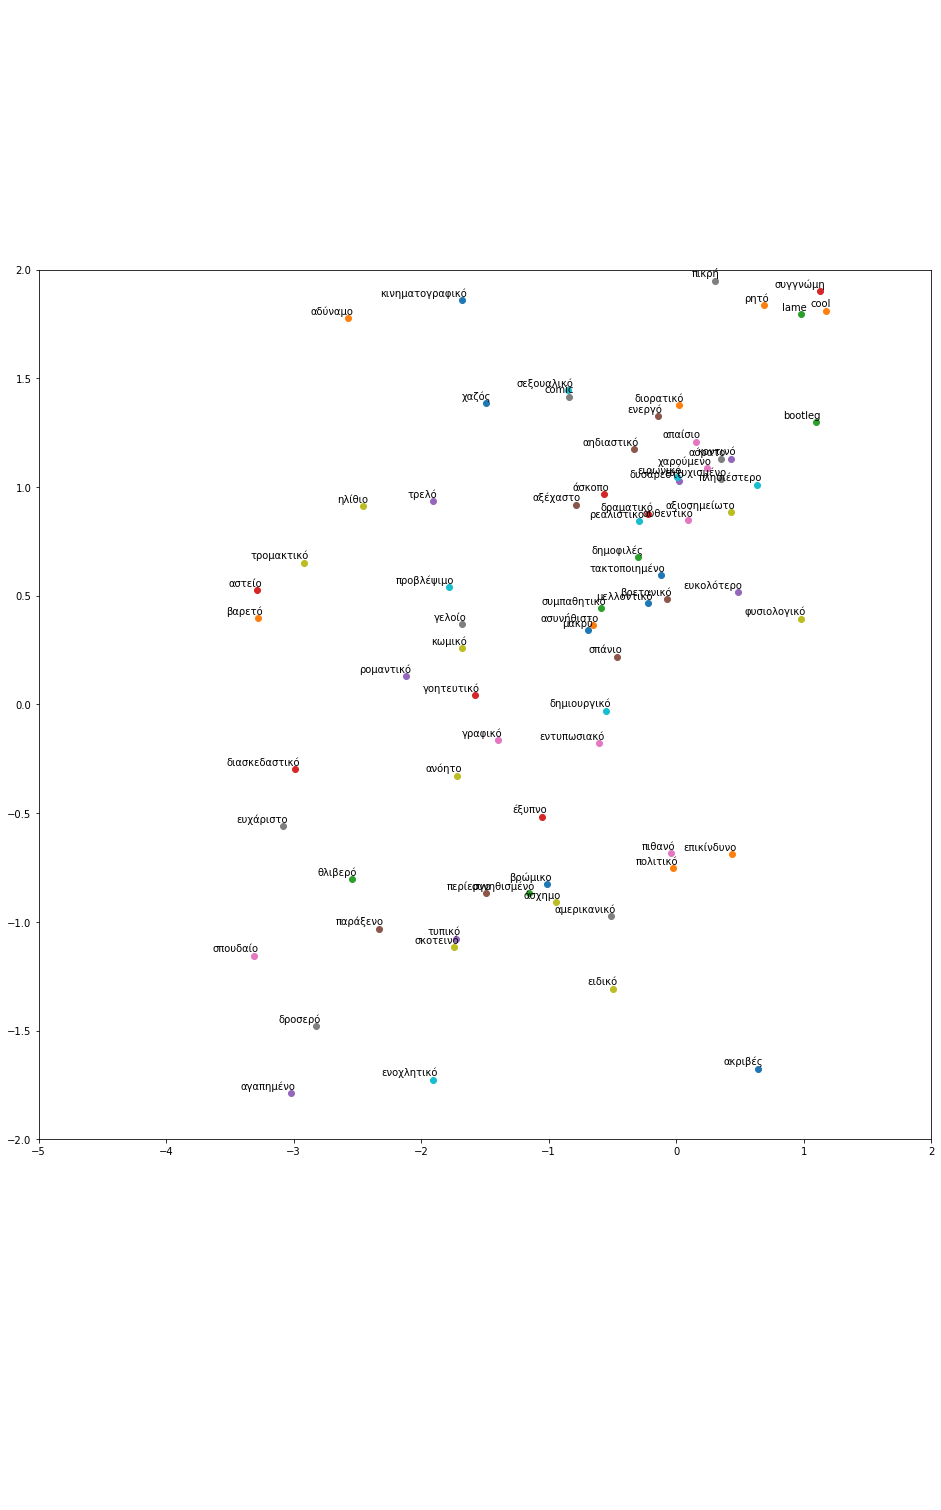

In [174]:
tsne_plot(model)

In [21]:
model3=Word2Vec.load("grmodel.bin")

In [23]:
model3.build_vocab(Lis)

<bound method BaseWordEmbeddingsModel.build_vocab of <gensim.models.word2vec.Word2Vec object at 0x7f27b840c940>>

In [36]:
len(model3.wv.vocab)

8786

In [26]:
model3.save("grmodel.bin")

In [31]:
word_vectors.vocab

{'υπέροχη': <gensim.models.keyedvectors.Vocab at 0x7f27b720fbe0>,
 'δημιουργία': <gensim.models.keyedvectors.Vocab at 0x7f27b720fc18>,
 'πλούσια': <gensim.models.keyedvectors.Vocab at 0x7f27b720fb70>,
 'μείζονες': <gensim.models.keyedvectors.Vocab at 0x7f27b720fd30>,
 'παράγοντες': <gensim.models.keyedvectors.Vocab at 0x7f27b720fd68>,
 'αγαπημένα': <gensim.models.keyedvectors.Vocab at 0x7f27b720fcf8>,
 'κομμάτια': <gensim.models.keyedvectors.Vocab at 0x7f27b720fcc0>,
 'μεγαλύτερο': <gensim.models.keyedvectors.Vocab at 0x7f27b720fc88>,
 'soundtrack': <gensim.models.keyedvectors.Vocab at 0x7f27b720fba8>,
 'ακριβή': <gensim.models.keyedvectors.Vocab at 0x7f27b720fdd8>,
 'έκδοση': <gensim.models.keyedvectors.Vocab at 0x7f27b720fe48>,
 'μουσική': <gensim.models.keyedvectors.Vocab at 0x7f27b720ff60>,
 'χειρότερο': <gensim.models.keyedvectors.Vocab at 0x7f27b720fe10>,
 'βιβλίο': <gensim.models.keyedvectors.Vocab at 0x7f27b720fda0>,
 'ενδιαφέρον': <gensim.models.keyedvectors.Vocab at 0x7f27b72

In [42]:
model.most_similar("κακό",topn= 100)

[('χειρότερο', 0.8094525933265686),
 ('αστείο', 0.7422690987586975),
 ('ανόητο', 0.7180472612380981),
 ('ηλίθιο', 0.702718198299408),
 ('φρικτό', 0.7009479999542236),
 ('βαρετό', 0.6745805740356445),
 ('ενοχλητικό', 0.673354983329773),
 ('αξιοπρεπές', 0.672752320766449),
 ('παράξενο', 0.6580610275268555),
 ('απογοητευτικό', 0.6381670236587524),
 ('περίεργο', 0.6340513229370117),
 ('άσκοπο', 0.6336921453475952),
 ('χαζός', 0.6335783004760742),
 ('συνηθισμένο', 0.6333470344543457),
 ('θλιβερό', 0.6294199228286743),
 ('καλό', 0.6290056705474854),
 ('επικίνδυνο', 0.6258195042610168),
 ('θετικό', 0.625169575214386),
 ('δροσερό', 0.6240127086639404),
 ('τρομακτικό', 0.6192663908004761),
 ('γελοίο', 0.6084414720535278),
 ('τρομερό', 0.6077101826667786),
 ('cool', 0.5918258428573608),
 ('ολόκληρο', 0.5873302221298218),
 ('γοητευτικό', 0.5854121446609497),
 ('καταπληκτικό', 0.5804769992828369),
 ('ενεργό', 0.5751201510429382),
 ('αμερικανικό', 0.5724238157272339),
 ('τελικό', 0.5708696842193604

In [140]:
model.wv.vocab

/home/dimitra/miniconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


{'υπέροχη': <gensim.models.keyedvectors.Vocab at 0x7f27b720fbe0>,
 'δημιουργία': <gensim.models.keyedvectors.Vocab at 0x7f27b720fc18>,
 'πλούσια': <gensim.models.keyedvectors.Vocab at 0x7f27b720fb70>,
 'μείζονες': <gensim.models.keyedvectors.Vocab at 0x7f27b720fd30>,
 'παράγοντες': <gensim.models.keyedvectors.Vocab at 0x7f27b720fd68>,
 'αγαπημένα': <gensim.models.keyedvectors.Vocab at 0x7f27b720fcf8>,
 'κομμάτια': <gensim.models.keyedvectors.Vocab at 0x7f27b720fcc0>,
 'μεγαλύτερο': <gensim.models.keyedvectors.Vocab at 0x7f27b720fc88>,
 'soundtrack': <gensim.models.keyedvectors.Vocab at 0x7f27b720fba8>,
 'ακριβή': <gensim.models.keyedvectors.Vocab at 0x7f27b720fdd8>,
 'έκδοση': <gensim.models.keyedvectors.Vocab at 0x7f27b720fe48>,
 'μουσική': <gensim.models.keyedvectors.Vocab at 0x7f27b720ff60>,
 'χειρότερο': <gensim.models.keyedvectors.Vocab at 0x7f27b720fe10>,
 'βιβλίο': <gensim.models.keyedvectors.Vocab at 0x7f27b720fda0>,
 'ενδιαφέρον': <gensim.models.keyedvectors.Vocab at 0x7f27b72

In [55]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

display_closestwords_tsnescatterplot(model3.wv, 'κακός', 50) 

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [144]:
w2v.most_similar("κακό",topn= 100)

/home/dimitra/miniconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('καλό', 0.2721825838088989),
 ('χειρότερο', 0.21168282628059387),
 ('πνευματώδες', 0.2102273404598236),
 ('αιματηρό', 0.20935437083244324),
 ('θρυλικό', 0.207313671708107),
 ('αστείο', 0.20440182089805603),
 ('έντιμο', 0.20067335665225983),
 ('επώδυνο', 0.19852685928344727),
 ('θείος', 0.19840604066848755),
 ('μηχανικό', 0.19292646646499634),
 ('καθαρό', 0.19111400842666626),
 ('υπέροχοι', 0.18921075761318207),
 ('απρόθυμος', 0.18615178763866425),
 ('ειρωνικό', 0.18600960075855255),
 ('ευτυχισμένο', 0.18474316596984863),
 ('εντυπωσιακό', 0.18013633787631989),
 ('τελικό', 0.17660847306251526),
 ('εγωιστικό', 0.17610658705234528),
 ('σκοτεινό', 0.17330752313137054),
 ('εγκληματικό', 0.17281094193458557),
 ('ηλίθια', 0.17109182476997375),
 ('πρωταρχικό', 0.17061269283294678),
 ('παράξενο', 0.1705794632434845),
 ('διαδοχή', 0.16997312009334564),
 ('μετωπική', 0.16864636540412903),
 ('απατεώνες', 0.16822916269302368),
 ('συνηθισμένο', 0.16772529482841492),
 ('εβραϊκό', 0.1677173674106598)

In [80]:
for word in range(0, 99):
    print(nlist2[word])

('χειρότερο', 0.8094525933265686)
('αστείο', 0.7422690987586975)
('ανόητο', 0.7180472612380981)
('ηλίθιο', 0.702718198299408)
('φρικτό', 0.7009479999542236)
('βαρετό', 0.6745805740356445)
('ενοχλητικό', 0.673354983329773)
('αξιοπρεπές', 0.672752320766449)
('παράξενο', 0.6580610275268555)
('απογοητευτικό', 0.6381670236587524)
('περίεργο', 0.6340513229370117)
('άσκοπο', 0.6336921453475952)
('χαζός', 0.6335783004760742)
('συνηθισμένο', 0.6333470344543457)
('θλιβερό', 0.6294199228286743)
('καλό', 0.6290056705474854)
('επικίνδυνο', 0.6258195042610168)
('θετικό', 0.625169575214386)
('δροσερό', 0.6240127086639404)
('τρομακτικό', 0.6192663908004761)
('γελοίο', 0.6084414720535278)
('τρομερό', 0.6077101826667786)
('cool', 0.5918258428573608)
('ολόκληρο', 0.5873302221298218)
('γοητευτικό', 0.5854121446609497)
('καταπληκτικό', 0.5804769992828369)
('ενεργό', 0.5751201510429382)
('αμερικανικό', 0.5724238157272339)
('τελικό', 0.5708696842193604)
('πιθανό', 0.5674076080322266)
('προβλέψιμο', 0.5672776

In [125]:
len(nlist2)

100

In [127]:
len(w2v.wv.vocab)

8786

In [134]:
w2v.corpus_count 


69379

In [2]:
wordVectors=Word2Vec.load("grmodel.bin")

In [25]:
simWords= wordVectors.most_similar("κακό")

/home/dimitra/miniconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [26]:
for sWord in range(0,9):
    print(simWords[sWord][0])

χειρότερο
αστείο
ανόητο
ηλίθιο
φρικτό
βαρετό
ενοχλητικό
αξιοπρεπές
παράξενο
